https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples

In [1]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from collections import Counter

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

print(__doc__)

RANDOM_STATE = 42

# Create a folder to fetch the dataset
iris = load_iris()
X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 25, 1: 50, 2: 50},
    random_state=RANDOM_STATE,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

# Create a pipeline
pipeline = make_pipeline(
    NearMiss(version=2), StandardScaler(), LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Automatically created module for IPython interactive environment
Training target statistics: Counter({1: 38, 2: 38, 0: 17})
Testing target statistics: Counter({1: 12, 2: 12, 0: 8})
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.88      0.58      0.95      0.70      0.74      0.53        12
          2       0.69      0.92      0.75      0.79      0.83      0.70        12

avg / total       0.84      0.81      0.89      0.81      0.84      0.71        32



# Text Classification

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]
newsgroups_train = fetch_20newsgroups(subset="train", categories=categories)
newsgroups_test = fetch_20newsgroups(subset="test", categories=categories)

X_train = newsgroups_train.data
X_test = newsgroups_test.data

y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [15]:
newsgroups_train.data[1]

"Subject: Re: Biblical Backing of Koresh's 3-02 Tape (Cites enclosed)\nFrom: kmcvay@oneb.almanac.bc.ca (Ken Mcvay)\nOrganization: The Old Frog's Almanac\nLines: 20\n\nIn article <20APR199301460499@utarlg.uta.edu> b645zaw@utarlg.uta.edu (stephen) writes:\n\n>Seems to me Koresh is yet another messenger that got killed\n>for the message he carried. (Which says nothing about the \n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n>In the mean time, we sure learned a lot about evil and corruption.\n>Are you surprised things have gotten that rotten?\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.\n-- \nThe Old Frog's Almanac - A Salute to That Old Frog Hisse'f, Ryugen Fisher \n     (604) 245-3205 (v32) (604) 245-4366 (2400x4) SCO XENIX 2.3.2 GT \n  Ladysmi

In [22]:
set(newsgroups_train.target_names)

{'alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc'}

In [4]:
from collections import Counter

print(f"Training class distributions summary: {Counter(y_train)}")
print(f"Test class distributions summary: {Counter(y_test)}")

Training class distributions summary: Counter({2: 593, 1: 584, 0: 480, 3: 377})
Test class distributions summary: Counter({2: 394, 1: 389, 0: 319, 3: 251})


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.94      0.86      0.79      0.90      0.82       319
          1       0.96      0.92      0.99      0.94      0.95      0.90       389
          2       0.87      0.98      0.94      0.92      0.96      0.92       394
          3       0.97      0.36      1.00      0.52      0.60      0.33       251

avg / total       0.87      0.84      0.94      0.82      0.88      0.78      1353



In [ ]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [25]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline

print(__doc__)

rng = np.random.RandomState(42)


def plot_scatter(X, y, title):
    """Function to plot some data as a scatter plot."""
    plt.figure()
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1")
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0")
    plt.legend()
    plt.title(title)

Automatically created module for IPython interactive environment


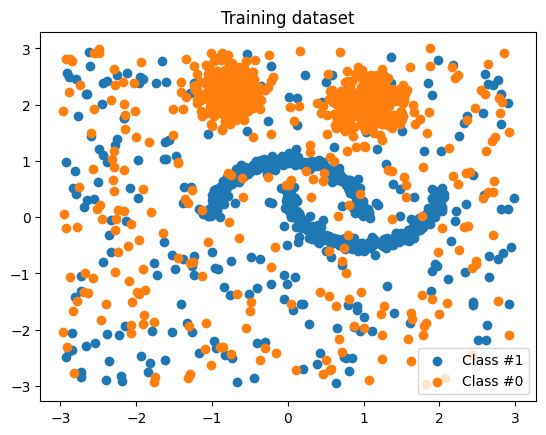

In [26]:
moons, _ = make_moons(n_samples=500, noise=0.05)
blobs, _ = make_blobs(
    n_samples=500, centers=[(-0.75, 2.25), (1.0, 2.0)], cluster_std=0.25
)
outliers = rng.uniform(low=-3, high=3, size=(500, 2))
X_train = np.vstack([moons, blobs, outliers])
y_train = np.hstack(
    [
        np.ones(moons.shape[0], dtype=np.int8),
        np.zeros(blobs.shape[0], dtype=np.int8),
        rng.randint(0, 2, size=outliers.shape[0], dtype=np.int8),
    ]
)

plot_scatter(X_train, y_train, "Training dataset")

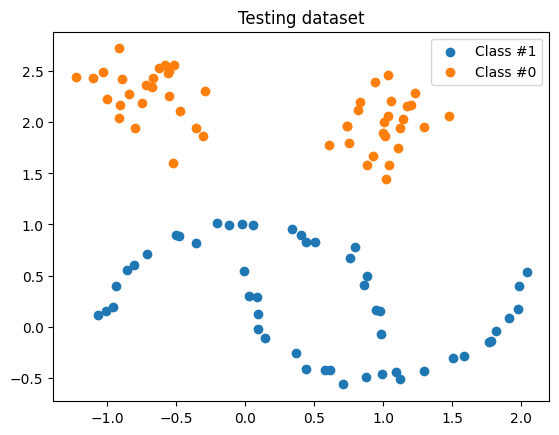

In [27]:
moons, _ = make_moons(n_samples=50, noise=0.05)
blobs, _ = make_blobs(
    n_samples=50, centers=[(-0.75, 2.25), (1.0, 2.0)], cluster_std=0.25
)
X_test = np.vstack([moons, blobs])
y_test = np.hstack(
    [np.ones(moons.shape[0], dtype=np.int8), np.zeros(blobs.shape[0], dtype=np.int8)]
)

plot_scatter(X_test, y_test, "Testing dataset")

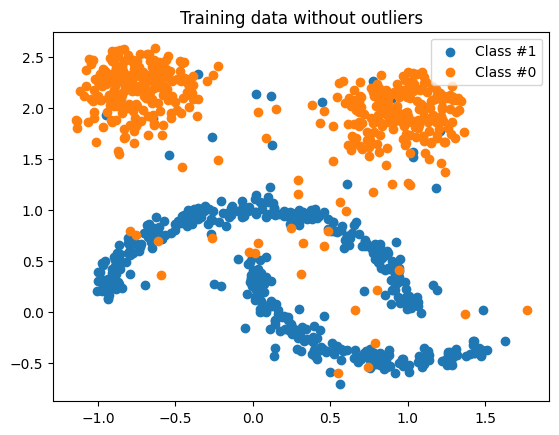

In [28]:
def outlier_rejection(X, y):
    """This will be our function used to resample our dataset."""
    model = IsolationForest(max_samples=100, contamination=0.4, random_state=rng)
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]


reject_sampler = FunctionSampler(func=outlier_rejection)
X_inliers, y_inliers = reject_sampler.fit_resample(X_train, y_train)
plot_scatter(X_inliers, y_inliers, "Training data without outliers")

In [29]:
pipe = make_pipeline(
    FunctionSampler(func=outlier_rejection),
    LogisticRegression(solver="lbfgs", multi_class="auto", random_state=rng),
)
y_pred = pipe.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

clf = LogisticRegression(solver="lbfgs", multi_class="auto", random_state=rng)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.84      0.91        50

    accuracy                           0.92       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100

